In [27]:
from scipy.io import netcdf

file2read_2015 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2015.nc','r')
file2read_2016 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2016.nc','r')
file2read_2017 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2017.nc','r')
file2read_2018 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2018.nc','r')
file2read_2019 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2019.nc','r')

temp_2015 = file2read_2015.variables["dis24"]
temp_2016 = file2read_2016.variables["dis24"]
temp_2017 = file2read_2017.variables["dis24"]
temp_2018 = file2read_2018.variables["dis24"]
temp_2019 = file2read_2019.variables["dis24"]

#missing values are encoded as 1e20

/tmp/ipykernel_3666/1560087656.py:3: DeprecationWarning: Please use `NetCDFFile` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  file2read_2015 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2015.nc','r')
/home/paul/.local/lib/python3.10/site-packages/scipy/io/_netcdf.py:305: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  warnings.warn((
/tmp/ipykernel_3666/1560087656.py:4: DeprecationWarning: Please use `NetCDFFile` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  file2read_2016 = netcdf.NetCDFFile('../data/yearly_discharge/discharge_2016.nc','r')
/tmp/ipykernel_3666/1560087656.py:5: DeprecationWarning: Please use `NetCDFFile` from the `scipy

In [28]:
lon_values = file2read_2015.variables["lon"][:]
lat_values = file2read_2015.variables["lat"][:]

In [47]:
data_2015 = temp_2015[:]*1
data_2016 = temp_2016[:]*1
data_2017 = temp_2017[:]*1
data_2018 = temp_2018[:]*1
data_2019 = temp_2019[:]*1

In [56]:
import numpy as np
#replace missing values with nan
data_2015[data_2015==1e20] = np.nan
data_2016[data_2016==1e20] = np.nan
data_2017[data_2017==1e20] = np.nan
data_2018[data_2018==1e20] = np.nan
data_2019[data_2019==1e20] = np.nan

## Sarah, why is it not rounding the values in the label to two digits?

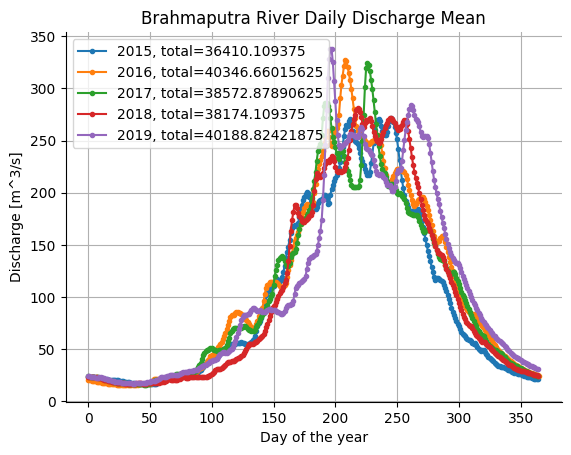

In [124]:
import matplotlib.pyplot as plt

lon_to_plot = 25
lat_to_plot = 100

mean_2015 = np.nanmean(data_2015, axis=(1,2))
mean_2016 = np.nanmean(data_2016, axis=(1,2))
mean_2017 = np.nanmean(data_2017, axis=(1,2))
mean_2018 = np.nanmean(data_2018, axis=(1,2))
mean_2019 = np.nanmean(data_2019, axis=(1,2))

total_discharge_2015 = np.round(np.sum(np.nanmean(data_2015, axis=(1,2))), 2)
total_discharge_2016 = np.sum(np.nanmean(data_2016, axis=(1,2)))
total_discharge_2017 = np.sum(np.nanmean(data_2017, axis=(1,2)))
total_discharge_2018 = np.sum(np.nanmean(data_2018, axis=(1,2)))
total_discharge_2019 = np.sum(np.nanmean(data_2019, axis=(1,2)))

plt.plot(mean_2015,".-", label=f'2015, total={float(total_discharge_2015):2f}')
plt.plot(mean_2016,".-", label=f'2016, total={total_discharge_2016.round(2)}')
plt.plot(mean_2017,".-", label=f'2017, total={total_discharge_2017}')
plt.plot(mean_2018,".-", label=f'2018, total={total_discharge_2018}')
plt.plot(mean_2019,".-", label=f'2019, total={total_discharge_2019}')

plt.xlabel('Day of the year')
plt.ylabel('Discharge [m^3/s]')
plt.title(f'Brahmaputra River Daily Discharge Mean')
plt.legend()
plt.grid()
plt.show()

- Sanity check: mean discharge (40k) is somewhat close to the numbers from the other dataset (46k)
- Tried adding variance bands but are meaningless as there is so much variation along the river which makes sense.

In [129]:
np.sum(np.isnan(data_2016))

16930428

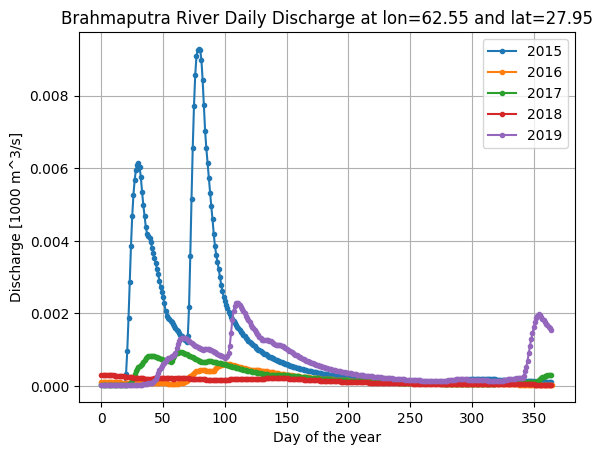

In [77]:
lat_to_plot = 100
lon_to_plot = 25

plt.plot(data_2015[:,lat_to_plot,lon_to_plot],".-", label='2015')
plt.plot(data_2016[:,lat_to_plot,lon_to_plot],".-", label='2016')
plt.plot(data_2017[:,lat_to_plot,lon_to_plot],".-", label='2017')
plt.plot(data_2018[:,lat_to_plot,lon_to_plot],".-", label='2018')
plt.plot(data_2019[:,lat_to_plot,lon_to_plot],".-", label='2019')
plt.xlabel('Day of the year')
plt.ylabel('Discharge [1000 m^3/s]')
plt.title(f'Brahmaputra River Daily Discharge at lon={round(lon_values[lon_to_plot],2)} and lat={round(lat_values[lat_to_plot],2)}')
plt.legend()
plt.grid()
plt.show()

Estimating a Model
- Right now, there are no control inputs so we estimate *Natures* state.


We have:
-  Horizon $T:= 10$
- $A$ unknown, $B$ identity, $C$ Identity, $D$ Identity
- We have measurements at $16884170$ different (lon, lat) states. As this system is fully observable, we have $n = p = 16884170$ , $u=0$
- We have to normalize our data such that $x_0 = 0$
- We have $N=5$ rollouts.